# Deadlines aus Simulation (FIFO)

In [1]:
# Datenzugriff
from configs.config import get_path

# Utils
import src.utils.presenter as show
from src.utils.analize import check_constrains as check

from src.utils.production_process import initialize as init

# Extern
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.min_rows', 16)
pd.set_option('display.max_rows', 24)

In [2]:
# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

In [3]:
day_count = 4
basic_data_path = get_path("data", "basic")

df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_jssp, df_jobs_arrivals = init.create_production_orders_for_shifts(df_template=df_instance, shift_count=day_count,
                                                                 shift_length=1440, shuffle=True, 
                                                                 job_seed=40, arrival_seed=80)
df_jobs_arrivals

,Job,Production_Plan_ID,Arrival
0,0,0,51
1,1,1,136
2,2,2,158
3,3,3,236
4,4,4,404
5,5,5,485
6,6,6,501
7,7,7,528
...,...,...,...
63,63,5,5239


In [4]:
shift_length=1440

df_jobs_arrivals['Ready Time'] = df_jobs_arrivals['Arrival'].apply(lambda arrival: math.ceil((arrival + 1) / shift_length) * shift_length)
df_jobs_arrivals

,Job,Production_Plan_ID,Arrival,Ready Time
0,0,0,51,1440
1,1,1,136,1440
2,2,2,158,1440
3,3,3,236,1440
4,4,4,404,1440
5,5,5,485,1440
6,6,6,501,1440
7,7,7,528,1440
...,...,...,...,...
63,63,5,5239,5760


In [5]:
df_jssp = df_jssp.merge(
    df_jobs_arrivals[['Job', 'Production_Plan_ID','Arrival', 'Ready Time']],
    on=['Job', 'Production_Plan_ID'],
    how='left'
)
df_jssp

,Job,Production_Plan_ID,Operation,Machine,Processing Time,Arrival,Ready Time
0,0,0,0,M00,29,51,1440
1,0,0,1,M01,78,51,1440
2,0,0,2,M02,9,51,1440
3,0,0,3,M03,36,51,1440
4,0,0,4,M04,49,51,1440
5,0,0,5,M05,11,51,1440
6,0,0,6,M06,62,51,1440
7,0,0,7,M07,56,51,1440
...,...,...,...,...,...,...,...
702,70,0,2,M02,9,5757,5760


## I) Simulation

In [6]:
simulation = ProductionSimulation(df_jssp, earliest_start_column = "Ready Time", sigma=0)
df_fcfs_execution = simulation.run(start_time = 0, end_time=None)

[Day 1 00:00:00] Job 0 started on M00
[Day 1 00:00:00] Job 2 started on M01
[Day 1 00:00:00] Job 4 started on M02
[Day 1 00:14:00] Job 4 finished on M02 (after 14 minutes)
[Day 1 00:14:00] Job 5 started on M02
[Day 1 00:29:00] Job 0 finished on M00 (after 29 minutes)
[Day 1 00:29:00] Job 1 started on M00
[Day 1 01:12:00] Job 1 finished on M00 (after 43 minutes)
[Day 1 01:12:00] Job 8 started on M00
[Day 1 01:31:00] Job 2 finished on M01 (after 91 minutes)
[Day 1 01:31:00] Job 3 started on M01
[Day 1 01:38:00] Job 5 finished on M02 (after 84 minutes)
[Day 1 01:38:00] Job 7 started on M02
[Day 1 02:09:00] Job 7 finished on M02 (after 31 minutes)
[Day 1 02:09:00] Job 14 started on M02
[Day 1 02:23:00] Job 14 finished on M02 (after 14 minutes)
[Day 1 02:23:00] Job 15 started on M02
[Day 1 02:28:00] Job 8 finished on M00 (after 76 minutes)
[Day 1 02:28:00] Job 10 started on M00
[Day 1 02:52:00] Job 3 finished on M01 (after 81 minutes)
[Day 1 02:52:00] Job 6 started on M01
[Day 1 02:54:00] J

In [7]:
df_fcfs_execution

,Job,Production_Plan_ID,Operation,Machine,Arrival,Ready Time,Start,Processing Time,End
0,0,0,0,M00,51,1440,1440.0,29.0,1469.0
1,0,0,1,M01,51,1440,2000.0,78.0,2078.0
2,0,0,2,M02,51,1440,2156.0,9.0,2165.0
3,0,0,3,M03,51,1440,2303.0,36.0,2339.0
4,0,0,4,M04,51,1440,2394.0,49.0,2443.0
5,0,0,5,M05,51,1440,2643.0,11.0,2654.0
6,0,0,6,M06,51,1440,2654.0,62.0,2716.0
7,0,0,7,M07,51,1440,2869.0,56.0,2925.0
...,...,...,...,...,...,...,...,...,...
702,70,0,2,M02,5757,5760,6547.0,9.0,6556.0


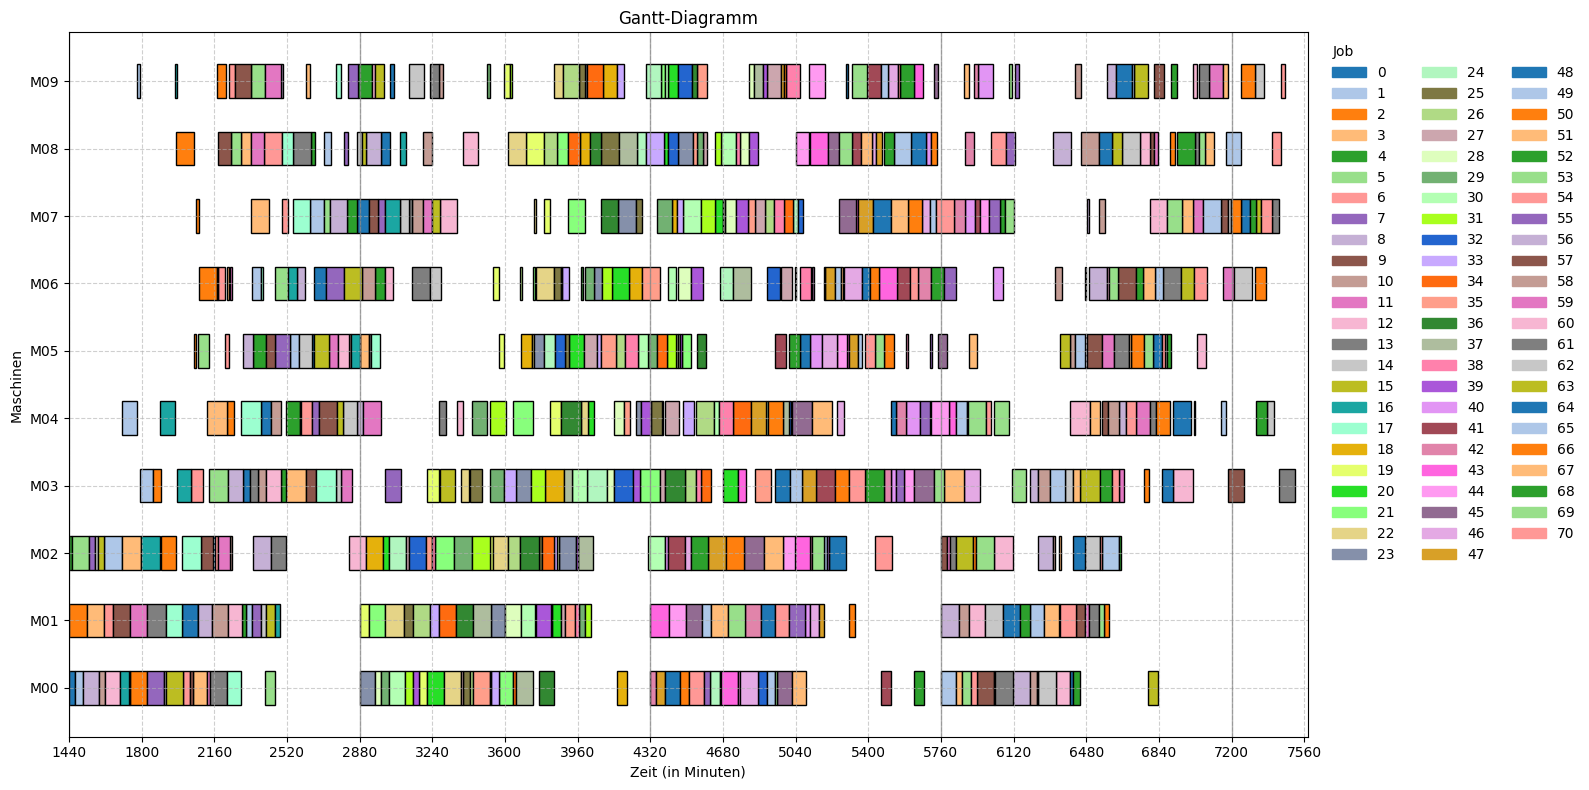

In [8]:
show.plot_gantt(df_fcfs_execution, perspective="Machine")

In [9]:
# Letzte Operation je Job auswählen
df_last_ops = df_fcfs_execution.sort_values("Operation").groupby("Job").last().reset_index()
df_last_ops

,Job,Production_Plan_ID,Operation,Machine,Arrival,Ready Time,Start,Processing Time,End
0,0,0,9,M09,51,1440,3029.0,21.0,3050.0
1,1,1,9,M08,136,1440,2706.0,30.0,2736.0
2,2,2,9,M04,158,1440,2225.0,33.0,2258.0
3,3,3,9,M05,236,1440,2883.0,43.0,2926.0
4,4,4,9,M06,404,1440,2954.0,53.0,3007.0
5,5,5,9,M07,485,1440,2706.0,25.0,2731.0
6,6,6,9,M04,501,1440,2591.0,55.0,2646.0
7,7,7,9,M03,528,1440,3006.0,79.0,3085.0
...,...,...,...,...,...,...,...,...,...
63,63,5,9,M07,5239,5760,7320.0,25.0,7345.0


In [10]:
df_jobs_times = df_last_ops[["Job", "Production_Plan_ID", "Arrival", "Ready Time", "End"]]

df_proc_time = df_jssp.groupby("Job", as_index=False)["Processing Time"].sum()
df_jobs_times = df_jobs_times.merge(df_proc_time, on="Job", how="left")
df_jobs_times

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time
0,0,0,51,1440,3050.0,395
1,1,1,136,1440,2736.0,510
2,2,2,158,1440,2258.0,568
3,3,3,236,1440,2926.0,655
4,4,4,404,1440,3007.0,393
5,5,5,485,1440,2731.0,496
6,6,6,501,1440,2646.0,416
7,7,7,528,1440,3085.0,539
...,...,...,...,...,...,...
63,63,5,5239,5760,7345.0,496
